_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Lösung zu Übung 07 - Allgemein: Hashtags
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
---
Im folgenden Tutorial wollen wir etwas mehr über das Twitter-Verhalten der verschiedenen user-Gruppen herausfinden. Wieviele Hashtags und Links benutzen sie? Wie lang sind die Worte, die sie benutzen? 
Das Tutorial gliedert sich in
* [Mittelwert, Median und Standardabweichung](#mittelwert_und_median)
* [Hashtags](#hashtags)

<a name="mittelwert_und_median"></a>1. Mittelwert, Median und Standardabweichung
---
Zur Vorbereitung laden wir wieder die Datensätze, die wir gespeichert haben. Da insbesondere der Datensatz der normalen User so groß ist (192 MB), dass er unserer IT-Infrastruktur Probleme bereitet, haben wir zwei neue Versionen des normalen- und Troll-user Datensatzes bereitgestellt, die nur eine Untermenge der verfügbaren Tweets enthalten. Die Tweets in den neuen Versionen haben wir zufällig aus dem ganzen Datensatz gezogen. Falls dich interessiert, wie das gemacht wird, kannst du die Vorgehensweise im (ebenfalls im StudIP hochgeladenen) Notebook ```data_subsampling.ipynb``` nachsehen.

**A.** lade die zwei Datensätze ```tweets_normal_subset.csv``` und ```tweets_trump_subset.csv``` aus dem StudIP herunter und in den JupyteHub hoch. Wir laden die Tabellen wieder in ```pandas``` DataFrames:

In [1]:
# importiere die Bibliothek Pandas mit dem Kürzel "pd"
import pandas as pd

tweets_trump = pd.read_csv('tweets_trump.csv')
tweets_troll = pd.read_csv('tweets_troll_subset.csv')
tweets_normal = pd.read_csv('tweets_normal_subset.csv', encoding='ISO-8859-1')

In [2]:
tweets_troll.head()

,Unnamed: 0,Unnamed: 0.1,Date,User,Tweet,Language,Follower,Following,tweet_length,word_number
0,7,7,10/1/2017 2:52,10_GOP,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,English,9644,1050,141,20
1,64,64,10/14/2017 2:49,10_GOP,"Liberal's are the most hate filled, racist, hy...",English,10458,1074,168,22
2,476,476,3/10/2017 10:56,1LORENAFAVA1,Peggio di #linkedin che non funziona c'è chi d...,Italian,58,416,128,16
3,543,543,3/11/2017 16:16,1LORENAFAVA1,Se pensate che la clitoride sia solo quel picc...,Italian,67,415,132,19
4,731,731,3/15/2017 10:44,1LORENAFAVA1,#Video 'Questione di Karma': Elio #Germano e F...,Italian,80,412,163,19


Mit Hilfe von einfachen statistischen Maßen wie Mittelwert und Median lässt sich schnell ein Überblick über die in einem Datensatz enthaltene Information gewinnen:  

**B.** Berechne Mittelwert, Median und Standardabweichung der Tweet-Länge sowie der Wortanzahl der Tweets der verschiedenen Datensätze.  

In [3]:
for df, name in zip([tweets_trump, tweets_troll, tweets_normal], ['Trump', 'Trolle', 'normale User']):
    print('Die Mittlere Wortanzahl / Tweet für {} ist {:1.2f} Worte'\
          .format(name, df['word_number'].mean()))
    print('Die Standardabweichung für {} ist {:1.2f} Worte'\
          .format(name, df['word_number'].std()))
    print('Der Median für {} ist {:1.2f} Worte'\
          .format(name, df['word_number'].median()))
    print()

Die Mittlere Wortanzahl / Tweet für Trump ist 17.01 Worte
Die Standardabweichung für Trump ist 6.86 Worte
Der Median für Trump ist 18.00 Worte

Die Mittlere Wortanzahl / Tweet für Trolle ist 13.67 Worte
Die Standardabweichung für Trolle ist 5.63 Worte
Der Median für Trolle ist 13.00 Worte

Die Mittlere Wortanzahl / Tweet für normale User ist 14.37 Worte
Die Standardabweichung für normale User ist 7.02 Worte
Der Median für normale User ist 13.00 Worte



**C.** Was bedeutet die Standardabweichung in diesem Kontext? Wie interpretierst du die Ergebnisse?  
* _Die Standardabweichung ist ein Maß dafür, wie stark sich die einzelnen Tweets voneinander unterscheiden. Ist sie niedrig, haben fast alle Tweets die gleiche Anzahl an Worten. Ist sie hoch, dann gibt es eine große Streuung der Wort-Anzahl der Tweets._
* _Trump benutzt deutlich mehr Worte als die Trolle und die normalen User. Seine Tweets sind aber insgesamt im Mittel sogar ein wenig kürzer als die Tweets der Trolle (siehe Aufgabe **2.B.** aus Übung 06). Das spricht dafür, dass Trump gerne kurze Worte benutzt._

**D.** Um die Robustheit von Mittelwert und Median zu testen, setze den Wert für die Tweet-Länge in der ersten Zeile des DataFrames der Trump-Tweets auf $10^6$ (eine Million). Wie verhält sich der Mittelwert und wie der Median? Wie die Standardabweichung? <font color='green'>**HINWEIS:** Du solltest für diese Aufgabe eine Kopie des DataFrames (siehe ```df.copy()```-[Funktion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) erstellen, da es gute Praxis ist, keine Originaldaten zu manipulieren sondern Kopien zu erstellen, wenn Originaldaten verändert werden sollen. </font>  

In [4]:
# kopiere das DataFrame
tweets_trump_copy = tweets_trump.copy()
# setze den Wert auf 1 Million
tweets_trump_copy.at[0, 'tweet_length'] = 1000000
# überprüfe das DataFrame
tweets_trump_copy.head()

,Unnamed: 0,Date,User,Tweet,tweet_length,word_number
0,0,2009-05-20 22:29:00,realDonaldTrump,Read a great interview with Donald Trump that ...,1000000.0,16.0
1,1,2010-11-29 15:52:00,realDonaldTrump,Congratulations to Evan Lysacek for being nomi...,127.0,23.0
2,2,2010-10-28 18:53:00,realDonaldTrump,I was on The View this morning. We talked abou...,139.0,23.0
3,3,2010-11-24 17:20:00,realDonaldTrump,Tomorrow night's episode of The Apprentice del...,140.0,23.0
4,4,2009-11-16 21:06:00,realDonaldTrump,Donald Trump Partners with TV1 on New Reality ...,116.0,14.0


In [5]:
print('Original')
print('Mittelwert: {:1.2f}'.format(tweets_trump['tweet_length'].mean()))
print('Median: {:1.2f}'.format(tweets_trump['tweet_length'].median()))

print()
print('Mit Ausreißer')
print('Mittelwert: {:1.2f}'.format(tweets_trump_copy['tweet_length'].mean()))
print('Median: {:1.2f}'.format(tweets_trump_copy['tweet_length'].median()))

Original
Mittelwert: 111.13
Median: 123.00

Mit Ausreißer
Mittelwert: 141.61
Median: 123.00


**E. (optional)** Wie kannst du dir mit Hilfe einer Visualisierung schnell Überblick über die Werte in einem Datensatz erhalten und "Außreißer, wie der den wir in Aufgabe **D.** eingefügt haben identifizieren?

* _hier bietet sich ein einfaches Histogram an: wenn einzelne Werte weitab von allen anderen Werten liegen, dann werden alle Werte in einem einzigen Bin gruppiert, während der Ausreißer-Wert weit entfernt in seinem eigenen Bin auftaucht:_

In [6]:
import matplotlib.pyplot as plt
# Histogram
plt.hist(tweets_trump_copy['tweet_length'].dropna(), bins=50)
# Beschriftungen
plt.ylabel('Anzahl Tweets')
plt.ylabel('Anzahl Zeichen')

Text(0,0.5,'Anzahl Zeichen')

<a name="Hashtags"></a>2. Hashtags
---
Für den folgenden Aufgabenteil schreiben wir uns eine kleine Funktion, die herausfindet, ob ein Wort ein Hashtag ist oder nicht.

In [7]:
# Definition der Funktion: die Funktion bekommt als Argument
# die Variable "word" (hoffentlich ein String) übergeben und
# überprüft, ob es sich dabei um einen Hashtag handelt. 
# Entspreichend gibt sie "True" oder "False" zurück
def isHashTag(word):
    # ist das Zeichen "#" in word enthalten?
    if '#' in word:
        # wenn ja, gib "True" zurück und verlasse
        # die Funktion
        return True
    # wenn nein, gib "False" zurück und verlasse 
    # die Funktion
    return False

**A.** Versuche zu verstehen, was die Funktion ```isHashTag()``` tut und füge Kommentare, die die Funktion erklären in die obenstehende Code-Zelle, in der die Funktion definiert wird, ein. Teste die Funktionsweise der Funktion anhand einiger Worte (Strings).  

In [8]:
wort = "Daten"
print('Ist {} ein Hashtag? {}'.format(wort, isHashTag(wort)))
wort = "#DaLeLe"
print('Ist {} ein Hashtag? {}'.format(wort, isHashTag(wort)))

# hier wird ein Problem unserer Herangehensweise deutlich:
# die Funktion isHashTag() erkennt auch Hashtags, wenn sich
# das "#"-Zeichen mitten im Wort befindet. Das ließe sich mit
# etwas Mühe umgehen, wir gehen an dieser Stelle aber erst
# einmal davon aus, dass dieses Problem nur in ganz wenigen
# Fällen auftritt und deswegen für unsere Analyse nicht von
# Bedeutung ist
wort = "Telefon#"
print('Ist {} ein Hashtag? {}'.format(wort, isHashTag(wort)))

Ist Daten ein Hashtag? False
Ist #DaLeLe ein Hashtag? True
Ist Telefon# ein Hashtag? True


**B.** Der Datensatz mit den Troll-Tweets enthält auch andere Sprachen als Englisch. Für die folgende Analyse ist es wichtig, dass wir nur die Englischen Tweets betrachten, da andere Sprachen die Ergebnisse verzerren würden. Deswegen: filtere denn Troll-Datensatz so, dass nur die Englischen Tweets übrig bleiben. <font color='green'>**HINWEIS:** Du kannst dafür die in der Spalte ```Language``` enthaltene Information verwenden. </font>.

In [9]:
# Filter für den Eintrag "English" in der Spalte "Language"
language_mask = tweets_troll['Language'] == 'English'

# filtere das DataFrame. Wir überschreiben hier das originale
# DataFrame, da wir den Rest (die Tweets in anderen Sprachen)
# für die folgende Analyse nicht brauchen
tweets_troll = tweets_troll[language_mask]

**C.** Für jeden der drei Datensätze: iteriere über alle Tweets, zerteile jeden Tweet in eine Liste von Worten. Finde in dieser Liste die Hashtags. Speichere sowohl die Anzahl der Hashtags pro Tweet als auch die einzelnen Hashtags in einer (separaten) Liste.  Füge die Anzahl der Hashtags als neue Spalte ```number_hashtags``` zu den jeweiligen DataFrames hinzu. Speichere die DataFrames am Ende der Aufgabe ab. <font color='green'>**HINWEIS:** Wenn du eine existierende Liste um eine Teil-Liste erweitern möchtest, kannst du die Funktion ```existierende_liste.extend(teil_liste)``` verwenden. . Für einen einzelnen Tweet funktioniert die oben beschriebene Vorgehensweise wie folgt:

In [10]:
sample_tweet = '#JobOpportunity: als Studi bei uns an der @subugoe in der Abt. #Forschung & #Entwickung in der #Paulinerkirche mitarbeiten. Reguläres HiWi-Entgelt.  Aufgaben von Büro bis Veranstaltungen. Alle Deine Skills sind interessant für uns; außer Kaffeekochen, das macht die Maschine'
words = sample_tweet.split(' ')
hashtags = [word for word in words if isHashTag(word)]
number_hashtags = len(hashtags)
print(hashtags)
print('number of hashtags: {}'.format(number_hashtags))

['#JobOpportunity:', '#Forschung', '#Entwickung', '#Paulinerkirche']
number of hashtags: 4


In [11]:
# alle von Trump benutzten Hashtags

# Liste, um die Anzahl der Hashtags / Tweet zu speichern
hashtag_number_trump = []
# Liste, um alle vorkommenden Hashtags zu speichern
hashtags_trump = []

# iteriere über alle Tweets
for tweet in tweets_trump['Tweet']:
    # zerteile den Tweet entlang der Leerzeichen in Worte
    words = tweet.split(' ')
    # erstelle eine Liste der Hashtags aus der Liste der Worte
    hashtags = [word for word in words if isHashTag(word)]
    # hänge die Liste mit Hashtags an die globale Liste an
    hashtags_trump.extend(hashtags)
    # zähle die Anzahl der Hashtags im Tweet und füge die 
    # Zahl der Liste hinzu
    hashtag_number_trump.append(len(hashtags))

# füge die Anzahl der Hashtags / Tweet als neue Spalte
# zum DataFrame hinzu
tweets_trump['hashtag_number'] = hashtag_number_trump

In [12]:
hashtags_trump[0:5]

['#EvanForSI',
 '#TimeToGetTough',
 'everyone."\n#TimeToGetTough',
 '#TimeToGetTough',
 '#noratings']

In [13]:
# alle von den Trollen benutzten Hashtags
hashtag_number_troll = []
hashtags_troll = []

for tweet in tweets_troll['Tweet']:
    words = tweet.split(' ')
    hashtags = [word for word in words if isHashTag(word)]
    hashtag_number_troll.append(len(hashtags))
    hashtags_troll.extend(hashtags)
    
tweets_troll['hashtag_number'] = hashtag_number_troll

In [14]:
hashtags_troll[0:5]

['#BlackLivesMatter', '#BlackTwitter', '#MLK', '#MLKDay', '#BlackLivesMatter']

In [15]:
# alle von den normalen Usern benutzten Hashtags
hashtag_number_normal = []
hashtags_normal = []

for tweet in tweets_normal['Tweet']:
    words = tweet.split(' ')
    hashtags = [word for word in words if isHashTag(word)]
    hashtag_number_normal.append(len(hashtags))
    hashtags_normal.extend(hashtags)
    
tweets_normal['hashtag_number'] = hashtag_number_normal

In [16]:
hashtags_normal[0:5]

['#...We', '#spbpuk', '#squirrel', '#coktup', '#fb']

In [17]:
tweets_normal.to_csv('../daten/tweets_normal_subset.csv')
tweets_troll.to_csv('../daten/tweets_troll_subset.csv')
tweets_trump.to_csv('../daten/tweets_trump.csv')

**D.** Was ist die mittlere Anzahl an verwendeten Hashtags pro Tweet für die drei Datensätze? Was die Standardabweichung? Unterscheiden sich die drei User (Gruppen) stark? Kannst du dir das erklären?

In [18]:
for df, name in zip([tweets_trump, tweets_troll, tweets_normal], ['Trump', 'Trolle', 'normale User']):
    print('Die mittlere Anzahl Hashtags / Tweet für {} ist {:1.2f}, die Standardabweichung ist {:1.2f}'\
          .format(name, df['hashtag_number'].mean(), df['hashtag_number'].std()))

Die mittlere Anzahl Hashtags / Tweet für Trump ist 0.21, die Standardabweichung ist 0.55
Die mittlere Anzahl Hashtags / Tweet für Trolle ist 0.79, die Standardabweichung ist 1.17
Die mittlere Anzahl Hashtags / Tweet für normale User ist 0.03, die Standardabweichung ist 0.22


* _Bei weitem die meisten Hashtags benutzen mit fast einem Hashtag / Tweet die Trolle._
* _Trump benutzt regelmäßig Hashtags aber nicht besonders viele. Die normalen User benutzten fast keine Hashtags._
* _Die Nutzung von Hashtags könnte dafür sprechen, dass die jeweiligen Nutzer gezielt von der Funktion von Twitter Gebrauch machen möchten, Tweets zu einem bestimmten Thema über die Hashtags sichtbar zu machen. Wenn man als Ziel der Trolle (und Trump) annimmt, Aufmerksamkeit zu erregen, ergibt dieses Verhalten Sinn._
* _Umgekehrt sind die normalen Nutzer anscheinend nicht an dieser Funktionalität interessiert, oder sie wissen einfach nicht flächendeckend davon._

**E.** Erstelle für jeden der drei Datensätze ein neues DataFrame, das die Hashtags und ihre Länge (Zeichenanzahl) enthält. 

In [19]:
# Trump
hashtags_trump_df = pd.DataFrame({'tag':hashtags_trump,\
                               'length':[len(tag) for tag in hashtags_trump]})
hashtags_trump_df.head()

,tag,length
0,#EvanForSI,10
1,#TimeToGetTough,15
2,"everyone.""\n#TimeToGetTough",26
3,#TimeToGetTough,15
4,#noratings,10


In [20]:
# Trolle
hashtags_troll_df = pd.DataFrame({'tag':hashtags_troll,\
                               'length':[len(tag) for tag in hashtags_troll]})
hashtags_troll_df.head()

,tag,length
0,#BlackLivesMatter,17
1,#BlackTwitter,13
2,#MLK,4
3,#MLKDay,7
4,#BlackLivesMatter,17


In [21]:
# normale User
hashtags_normal_df = pd.DataFrame({'tag':hashtags_normal,\
                               'length':[len(tag) for tag in hashtags_normal]})
hashtags_normal_df.head()

,tag,length
0,#...We,6
1,#spbpuk,7
2,#squirrel,9
3,#coktup,7
4,#fb,3


In [22]:
# speichern der DataFrames
hashtags_trump_df.to_csv('daten/hashtags_trump.csv')
hashtags_troll_df.to_csv('daten/hashtags_troll.csv')
hashtags_normal_df.to_csv('daten/hashtags_normal.csv')

**F.** Wieviele verschiedene Hashtags benutzen Trump, die Trolle und die normalen User jeweils? <font color='green'>**HINWEIS:** Die Funktion ```df['spalte'].unique()``` hilft hier!</font> Warum ist es zulässig, die Zahlen zu vergleichen?

In [23]:
N_trump = len(hashtags_trump_df['tag'].unique())
print('Trump: Anzahl einzigartiger Hashtags {}'.format(N_trump))

N_troll = len(hashtags_troll_df['tag'].unique())
print('Trolle: Anzahl einzigartiger Hashtags {}'.format(N_troll))

N_normal = len(hashtags_normal_df['tag'].unique())
print('Normale User: Anzahl einzigartiger Hashtags {}'.format(N_normal))

Trump: Anzahl einzigartiger Hashtags 3017
Trolle: Anzahl einzigartiger Hashtags 6525
Normale User: Anzahl einzigartiger Hashtags 617


* _Da wir nur Untermengen des Troll-Datensatzes und des Datensatzes der normalen User verwenden, die wir so gewählt haben, dass sie genauso viele Tweets enthalten wie der Trump-Datensatz, ist es hier tatsächlich zulässig, absolute Zahlen miteinander zu vergleichen._

**G. (optional)** Visualisiere die Verteilung der Hashtag-Längen der drei Datensätze in einem Histogramm. Unterscheiden sie sich? Lass dir alle Hashtags mit einer Länge größer 30 Zeichen aus dem Trump-Datensatz anzeigen.

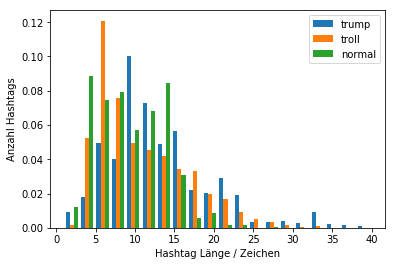

In [24]:
# Histogramm mit drei Datensätzen
plt.hist([hashtags_trump_df['length'], hashtags_troll_df['length'], hashtags_normal_df['length']],\
         rwidth=0.8, bins=20, range=[1,40], density=True,\
         label=['trump','troll','normal'])

# Beschriftungen
plt.xlabel('Hashtag Länge / Zeichen')
plt.ylabel('Anzahl Hashtags')
plt.legend()

In [25]:
# hier wird erkennbar, dass unsere Herangehensweise, die Worte herauszufiltern
# indem wir die Tweets entlang der Leerzeichen aufteilen manchmal versagt.
# Anscheinend geschieht das besonders häufig in der Nähe von Links
# Um das zu verbessern, müsste man die Links aus den Tweets herausfiltern
maske_long = hashtags_trump_df['length'] > 30
print('suspekte Einträge: {}'.format(len(hashtags_trump_df[maske_long])))
hashtags_trump_df[maske_long]

suspekte Einträge: 276


,tag,length
364,#TimeToGetTough\nhttp://t.co/Yy6GNcx3,36
1164,"longer....#celebrityapprentice""",31
1594,"#trumpinternationaltowerlasvegas""",33
2077,Hampshire!\n#MakeAmericaGreatAgain,33
2078,#Trump2016\nhttps://t.co/VlGF418r2x,34
2081,Holidays!\n#MakeAmericaGreatAgain,32
2082,#Trump2016\nhttps://t.co/XIVw5LdTqv,34
2094,Michigan!\n#MakeAmericaGreatAgain,32
2100,#Trump2016\nhttps://t.co/CE9f0mukFm,34
2106,#Trump2016\nhttps://t.co/czHzN0QkQN,34


**H. (optional)** Suche in den Tweets nach der Anzahl der Links. <font color='green'>**HINWEIS:** mit der Funktion ```str.count()``` eines Strings kannst du die Anzahl der Vorkommnise eines Teil-Strings zählen (siehe die [Dokumentation](https://docs.python.org/2/library/string.html) von ```string.count()```. Du kannst die Aufgabe auch z.B. mit Hilfe einer Funktion wie ```isHashTag()``` wie oben beschrieben lösen.</font> Füge allen drei DataFrames eine weitere Spalte mit der Anzahl an Links je Tweet hinzu (und speichere sie danach ab).  Wieviele Links je Tweet posten Trump, die Trolle und die normalen User durchschnittlich?   

In [26]:
# Links in den Trump-Tweets
link_number_trump = []

for tweet in tweets_trump['Tweet']:
    link_number = tweet.count('http')
    link_number_trump.append(link_number)
tweets_trump['link_number'] = link_number_trump

# Links in den Troll-Tweets
link_number_troll = []

for tweet in tweets_troll['Tweet']:
    link_number = tweet.count('http')
    link_number_troll.append(link_number)
tweets_troll['link_number'] = link_number_troll

# Links in den Tweets der normalen User
link_number_normal = []

for tweet in tweets_normal['Tweet']:
    link_number = tweet.count('http')
    link_number_normal.append(link_number)
tweets_normal['link_number'] = link_number_normal

# mittlere Anzahl der Links je Tweet für die drei Datensätze
print('Trump: durchschnittliche Link-Anzahl / Tweet: {:1.4f}'\
      .format(tweets_trump['link_number'].mean()))

print('Trolle: durchschnittliche Link-Anzahl / Tweet: {:1.4f}'\
      .format(tweets_troll['link_number'].mean()))

print('Normale User: durchschnittliche Link-Anzahl / Tweet: {:1.4f}'\
      .format(tweets_normal['link_number'].mean()))

Trump: durchschnittliche Link-Anzahl / Tweet: 0.2662
Trolle: durchschnittliche Link-Anzahl / Tweet: 0.9783
Normale User: durchschnittliche Link-Anzahl / Tweet: 0.0446


In [27]:
tweets_normal.to_csv('../daten/tweets_normal_subset.csv')
tweets_troll.to_csv('../daten/tweets_troll_subset.csv')
tweets_trump.to_csv('../daten/tweets_trump.csv')

**I. (optional)** Entferne alle Links aus den Hashtags und überprüfe, ob unsere Analyse der Hashtag-Längen sich verändert hat. Speichere auch die Hashtag DataFrames nach dem Bereinigen wieder ab.

Für die Lösung dieser Aufgabe machen wir uns zunutze, dass Links keine Leerzeichen enthalten.

In [28]:
# iteriere über alle Einträge im hashtags-DataFrame
for index, entry in hashtags_trump_df.iterrows():
    # links starten normalerweise mit den Buchstabe "http"
    link_start = 'http'
    # wenn wir einen Hashtag mit Link finden dann...
    if link_start in entry['tag']:
        # ... teile den Hashtag entlang link_start
        # es sieht so aus, als wäre der Hashtag immer VOR
        # dem Link, deswegen nehmen wir den ersten Eintrag
        # der aus split() resultierenden Liste
        hashtag = entry['tag'].split(link_start)[0]
        # update den Eintrag für den betroffenen Hashtag
        # im DataFrame
        hashtags_trump_df.at[index, 'tag'] = hashtag
        # WICHTIG: auch die Hashtag-Länge müssen wir
        # neu berechnen und updaten
        hashtags_trump_df.at[index, 'length'] = len(hashtag)

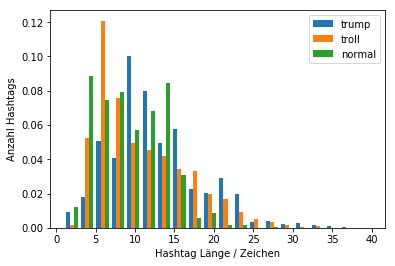

In [31]:
# Histogramm mit drei Datensätzen
plt.hist([hashtags_trump_df['length'], hashtags_troll_df['length'], hashtags_normal_df['length']],\
         rwidth=0.8, bins=20, range=[1,40], density=True,\
         label=['trump','troll','normal'])

# Beschriftungen
plt.xlabel('Hashtag Länge / Zeichen')
plt.ylabel('Anzahl Hashtags')
plt.legend()

* _Viel hat sich nicht verändert an der Darstellung, wenn man sie mit der Darstellung aus Aufgabe **2.G** vergleicht. Ein Indiz dafür, dass die "Verunreinigung" durch Links in der Hashtag-Liste vernachlässigbar ist._

In [29]:
# jetzt ist zwar das Problem mit den Links weg, es gibt aber immer
# noch Probleme mit Zeilenumbrüchen ('\n'). Trotzdem haben wir die
# Anzahl an suspekten Einträgen um etwa 60% reduzieren können, was
# schonmal nicht so schlecht für unseren recht simplen Ansatz ist
maske_long = hashtags_trump_df['length'] > 30
print('suspekte Einträge: {}'.format(len(hashtags_trump_df[maske_long])))
hashtags_trump_df[maske_long]

suspekte Einträge: 87


,tag,length
1164,"longer....#celebrityapprentice""",31
1594,"#trumpinternationaltowerlasvegas""",33
2077,Hampshire!\n#MakeAmericaGreatAgain,33
2081,Holidays!\n#MakeAmericaGreatAgain,32
2094,Michigan!\n#MakeAmericaGreatAgain,32
2202,#MakeAmericaGreatAgain!#Trump2016,33
2212,#Trump2016\n#MakeAmericaGreatAgain,33
2276,pollsters.\n#MakeAmericaGreatAgain,33
2293,support!\n#MakeAmericaGreatAgain,31
2359,Massachusetts!#MakeAmericaGreatAgain,36


In [30]:
# speichern der DataFrames
hashtags_trump_df.to_csv('daten/hashtags_trump.csv')
hashtags_troll_df.to_csv('daten/hashtags_troll.csv')
hashtags_normal_df.to_csv('daten/hashtags_normal.csv')

[Anfang](#top)